In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt # type: ignore
import numpy as np

In [2]:
img_array = cv2.imread("../input/drowsiness-dataset/train/Closed/_0.jpg", cv2.IMREAD_GRAYSCALE)

TypeError: Image data of dtype object cannot be converted to float

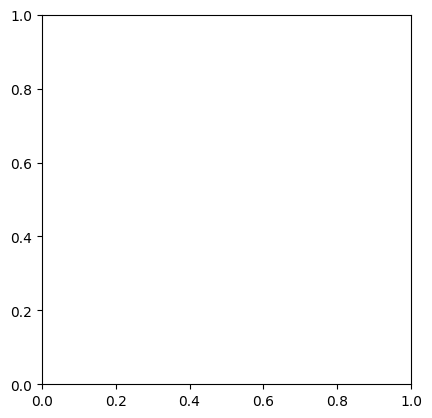

In [3]:
plt.imshow(img_array,cmap="gray")

In [ ]:
img_array.shape

(145, 145)

In [1]:
Datadirectory = "../input/drowsiness-dataset/train"
Classes = ["Closed","Open"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
    

NameError: name 'os' is not defined

In [5]:
img_size = 224
new_array= cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

NameError: name 'backtorgb' is not defined

In [6]:
img_array.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [7]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [8]:
create_training_Data()

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input/drowsiness-dataset/train\\Closed'

In [66]:
print(len(training_Data))

1452


In [67]:
import random
random.shuffle(training_Data)

In [68]:
X=[]
y=[]

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,img_size, img_size,3)
    

In [69]:
X.shape

(1452, 224, 224, 3)

In [70]:
X=X/255.0;

In [71]:
Y= np.array(y)

In [72]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [73]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [74]:
import keras
from tensorflow.keras import layers
from keras import backend as K

In [75]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [76]:
model = tf.keras.applications.mobilenet.MobileNet()

In [77]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [78]:
base_input = model.layers[0].input
base_output = model.layers[-4].output
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_ouput = layers.Activation('sigmoid')(final_output)

In [79]:
new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [80]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [81]:
new_model.fit(X,Y, epochs = 30, validation_split = 0.1)

Epoch 1/30
41/41 [==============================] - 10s 174ms/step - loss: 2.8574 - accuracy: 0.7751 - val_loss: 8.1504 - val_accuracy: 0.4658
Epoch 2/30
41/41 [==============================] - 6s 154ms/step - loss: 0.6999 - accuracy: 0.9446 - val_loss: 0.1218 - val_accuracy: 0.9863
Epoch 3/30
41/41 [==============================] - 6s 152ms/step - loss: 0.3564 - accuracy: 0.9743 - val_loss: 0.5283 - val_accuracy: 0.9658
Epoch 4/30
41/41 [==============================] - 6s 155ms/step - loss: 0.5166 - accuracy: 0.9645 - val_loss: 0.5283 - val_accuracy: 0.9658
Epoch 5/30
41/41 [==============================] - 6s 154ms/step - loss: 0.5436 - accuracy: 0.9610 - val_loss: 0.1044 - val_accuracy: 0.9932
Epoch 6/30
41/41 [==============================] - 6s 152ms/step - loss: 0.2573 - accuracy: 0.9774 - val_loss: 0.2113 - val_accuracy: 0.9863
Epoch 7/30
41/41 [==============================] - 6s 153ms/step - loss: 0.0558 - accuracy: 0.9960 - val_loss: 0.2113 - val_accuracy: 0.9863
Epoch

In [82]:
new_model.save('my_model.h5')

In [83]:
new_model = tf.keras.models.load_model('my_model.h5')

In [84]:
img_array = cv2.imread("../input/drowsiness-dataset/train/Closed/_0.jpg", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

In [85]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [86]:
X_input.shape

(1, 224, 224, 3)

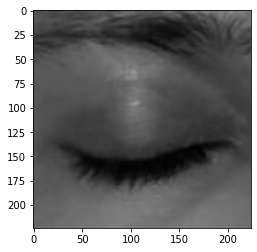

In [87]:
plt.imshow(new_array)

In [88]:
X_input = X_input/255.0

In [89]:
prediction = new_model.predict(X_input)

In [90]:
prediction

array([[-27.094997]], dtype=float32)

In [91]:
#CHECK IMAGE FROM INTERNET

In [92]:
img = cv2.imread('../input/testdataset/testimage.jpg')

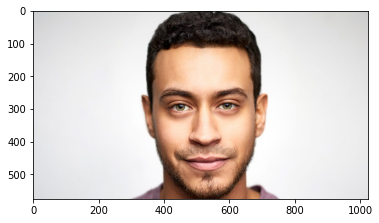

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [94]:
face=Cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_forntalface_default.xml')

In [95]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [96]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [97]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [98]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0))

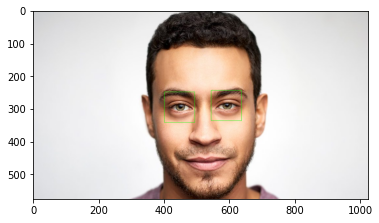

In [99]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [100]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]

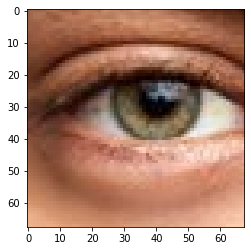

In [101]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [102]:
eyes_roi.shape

(68, 68, 3)

In [103]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0

In [104]:
new_model.predict(final_image)

array([[25.919857]], dtype=float32)

In [105]:
#REALTIME VIDEO DEMO

In [10]:
import cv2

# Initialize the webcam (0 for the default webcam)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Cannot open the webcam.")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # If frame is read correctly, ret is True
    if not ret:
        print("Error: Cannot receive frame (stream end?). Exiting...")
        break

    # Display the frame
    cv2.imshow('Webcam', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()


Error: Cannot receive frame (stream end?). Exiting...


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'
